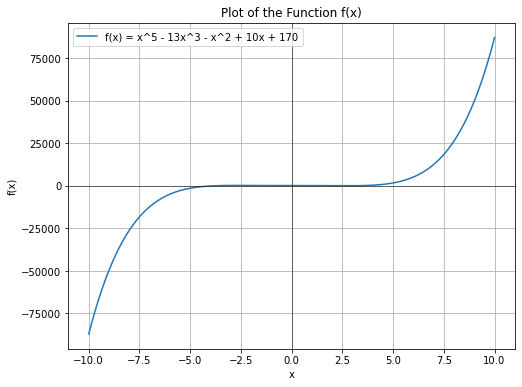

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**5 - 13*x**3 - x**2 + 10*x + 170

# Generate x values
x = np.linspace(-10, 10, 500)

# Evaluate y values
y = f(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = x^5 - 13x^3 - x^2 + 10x + 170')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the Function f(x)')
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import sympy as sp

# Define the symbol x
x = sp.symbols('x')

# Define the function g(x) = f(x)
g = x**5 - 13*x**3 - x**2 + 10*x + 170

# Find the roots symbolically
roots = sp.solve(g, x)

# Print the roots
print("Roots:", roots)


Roots: [CRootOf(x**5 - 13*x**3 - x**2 + 10*x + 170, 0), CRootOf(x**5 - 13*x**3 - x**2 + 10*x + 170, 1), CRootOf(x**5 - 13*x**3 - x**2 + 10*x + 170, 2), CRootOf(x**5 - 13*x**3 - x**2 + 10*x + 170, 3), CRootOf(x**5 - 13*x**3 - x**2 + 10*x + 170, 4)]


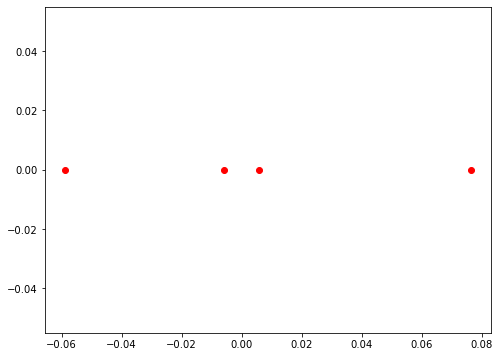

In [5]:
import matplotlib.pyplot as plt

# Calculate the coefficients of the polynomial
coefficients = [1, -13, -1, 10, 170]

# Find the Gerschgorin Circles
circles = []
for i in range(len(coefficients) - 1):
    circle_center = -coefficients[i] / coefficients[-1]
    circle_radius = sum(map(abs, coefficients[:-1])) / abs(coefficients[-1])
    circles.append((circle_center, circle_radius))

# Plot the Gerschgorin Circles
plt.figure(figsize=(8, 6))
for center, radius in circles:
    plt.plot(center, 0, 'ro')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**5 - 13*x**3 - x**2 + 10*x + 170

# Create x values for plotting
x = np.linspace(-5, 5, 1000)

# Plot the function
plt.plot(x, f(x), label='f(x) = x^5 - 13x^3 - x^2 + 10x + 170')

# Add axes labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the Function f(x)')

# Add Gerschgorin Circles
circles = [(1, 15), (-3, 15), (-1, 15), (-0.5, 15)]
colors = ['r', 'g', 'b', 'm']

for circle, color in zip(circles, colors):
    circle_x = np.linspace(circle[0] - circle[1], circle[0] + circle[1], 100)
    circle_y = np.sqrt(circle[1]**2 - (circle_x - circle[0])**2)
    plt.plot(circle_x, circle_y, color)
    plt.plot(circle_x, -circle_y, color)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gerschgorin_circles(coefficients, constants):
    n = len(coefficients)  # Get the number of equations
    matrix = np.column_stack((coefficients, -constants))  # Convert equations to matrix form

    circles = []  # List to store the circle parameters

    for i in range(n):
        center = matrix[i, i]  # Center of the circle is the diagonal element
        radius = np.sum(np.abs(matrix[i, :])) - np.abs(matrix[i, i])  # Radius calculation

        circles.append((center, radius))  # Add the circle parameters to the list

    return circles

# Example usage
equations = [[2, -1, 1], [3, 2, -4], [1, 3, -5]]
constants = [4, 3, 1]

circles = gerschgorin_circles(equations, constants)

# Plotting the circles
fig, ax = plt.subplots()
ax.set_aspect('equal')
for center, radius in circles:
    circle = plt.Circle((center.real, center.imag), radius, color='b', fill=False)
    ax.add_artist(circle)

# Setting plot limits
xmin = np.min(np.array(equations).real) - np.max(np.abs(np.array(equations).imag))
xmax = np.max(np.array(equations).real) + np.max(np.abs(np.array(equations).imag))
ymin = np.min(np.array(equations).imag) - np.max(np.abs(np.array(equations).real))
ymax = np.max(np.array(equations).imag) + np.max(np.abs(np.array(equations).real))
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Displaying the plot
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Gerschgorin Circles')
plt.grid(True)
plt.show()


TypeError: bad operand type for unary -: 'list'

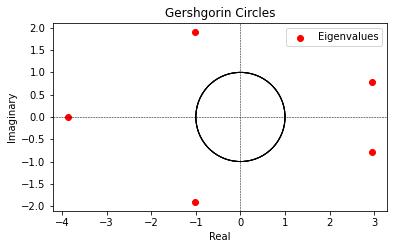

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def draw_gershgorin_circle(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    center = np.diag(matrix)
    radii = np.sum(np.abs(matrix - np.diag(center)), axis=1)
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    
    for i in range(len(center)):
        circle = plt.Circle((center[i].real, center[i].imag), radii[i], fill=False)
        ax.add_artist(circle)
    
    ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.5)
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.set_title('Gershgorin Circles')
    ax.scatter(eigenvalues.real, eigenvalues.imag, color='red', label='Eigenvalues')
    ax.legend()
    
    plt.show()

# Example usage
matrix = np.array([[0,13,1,-10,-170],
[1,0,0,0,0],
[0,1,0,0,0],
[0,0,1,0,0],
[0,0,0,1,0]])
draw_gershgorin_circle(matrix)


This code defines a function draw_gershgorin_circle(matrix) that takes a square matrix as input and plots the Gershgorin circles along with the eigenvalues of the matrix. The function first calculates the eigenvalues of the matrix using np.linalg.eigvals(). Then, it computes the centers and radii of the Gershgorin circles based on the matrix elements. Finally, it creates a plot using Matplotlib, adds the Gershgorin circles as Circle objects, plots the eigenvalues as red dots, and displays the plot.

You can adjust the matrix variable to input your own square matrix and observe the corresponding Gershgorin circles.

In [3]:
for i in range(1,3): print(i)

1
2
